In [1]:
import pandas as pd

file_path = 'data-big.xls'  
data = pd.read_excel(file_path, engine='xlrd')

from IPython.display import display
display(data.head(100))

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55.0,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,2,19.0,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2.0,Cash,Fortnightly
2,3,50.0,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly
3,4,21.0,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5,45.0,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,37.0,Male,Sneakers,Footwear,100,Missouri,L,Pink,Fall,3.8,Yes,PayPal,Free Shipping,Yes,Yes,48.0,PayPal,Monthly
96,97,32.0,Male,Gloves,Accessories,73,Delaware,S,Gold,Spring,3.6,Yes,Venmo,Express,Yes,Yes,43.0,Venmo,Every 3 Months
97,98,21.0,Male,Shoes,Footwear,92,Virginia,M,Teal,Winter,4.8,Yes,PayPal,Store Pickup,Yes,Yes,37.0,Cash,Annually
98,99,20.0,Male,Jeans,Clothing,67,New York,XL,Teal,Spring,2.6,Yes,Cash,Next Day Air,Yes,Yes,20.0,Bank Transfer,Annually


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3898 non-null   float64
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3899 non-null   object 
 7   Size                      3899 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3899 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3899 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [3]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Review Rating'].fillna(data['Review Rating'].median(), inplace=True)
data['Previous Purchases'].fillna(data['Previous Purchases'].median(), inplace=True)

for column in ['Location', 'Size', 'Payment Method', 'Preferred Payment Method']:
    data[column].fillna(data[column].mode()[0], inplace=True)

data['Age'] = data['Age'].astype(int)

data['Customer ID'] = data['Customer ID'].astype(str)

data.drop_duplicates(inplace=True)

median_age = data['Age'].median()
data.loc[(data['Age'] > 100) | (data['Age'] < 10), 'Age'] = median_age

data['Gender'] = data['Gender'].replace({'Mlae': 'Male', 'Femle': 'Female'})

print(data.isnull().sum())

cleaned_file_path = 'cleaned_data.xlsx'
data.to_excel(cleaned_file_path, index=False)

print(f'Барлығы дұрыс сақталды{cleaned_file_path}')
print(data.dtypes)

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
Барлығы дұрыс сақталдыcleaned_data.xlsx
Customer ID                  object
Age                           int32
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating    

In [4]:
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating']
numerical_stats = data[numerical_columns].describe().T
numerical_stats['median'] = data[numerical_columns].median()
numerical_stats['mode'] = data[numerical_columns].mode().iloc[0]

print(numerical_stats)

                        count       mean        std   min   25%   50%   75%  \
Age                    3900.0  44.061538  15.204541  18.0  31.0  44.0  57.0   
Purchase Amount (USD)  3900.0  59.764359  23.685392  20.0  39.0  60.0  81.0   
Previous Purchases     3900.0  25.347179  14.444665   1.0  13.0  25.0  38.0   
Review Rating          3900.0   3.749667   0.716026   2.5   3.1   3.7   4.4   

                         max  median  mode  
Age                     70.0    44.0  69.0  
Purchase Amount (USD)  100.0    60.0  32.0  
Previous Purchases      50.0    25.0  31.0  
Review Rating            5.0     3.7   3.4  


In [5]:
category_counts = data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
print("\nСуммарная сумма покупок по категориям:")
print(category_counts)

gender_counts = data['Gender'].value_counts()
print("\nЧастота по полу:")
print(gender_counts)

payment_counts = data['Payment Method'].value_counts()
print("\nЧастота по методам оплаты:")
print(payment_counts)


Суммарная сумма покупок по категориям:
Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

Частота по полу:
Gender
Male      2652
Female    1248
Name: count, dtype: int64

Частота по методам оплаты:
Payment Method
Credit Card      697
Venmo            652
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64


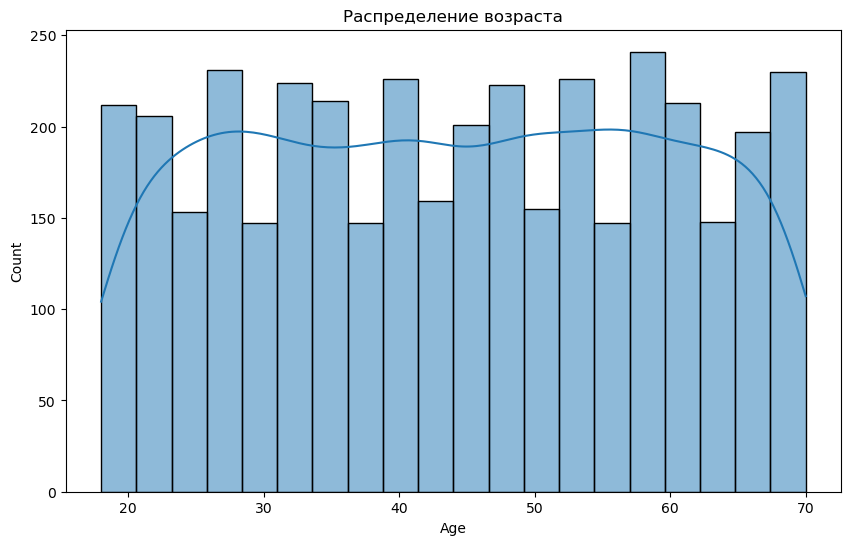

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Распределение возраста')
plt.show()

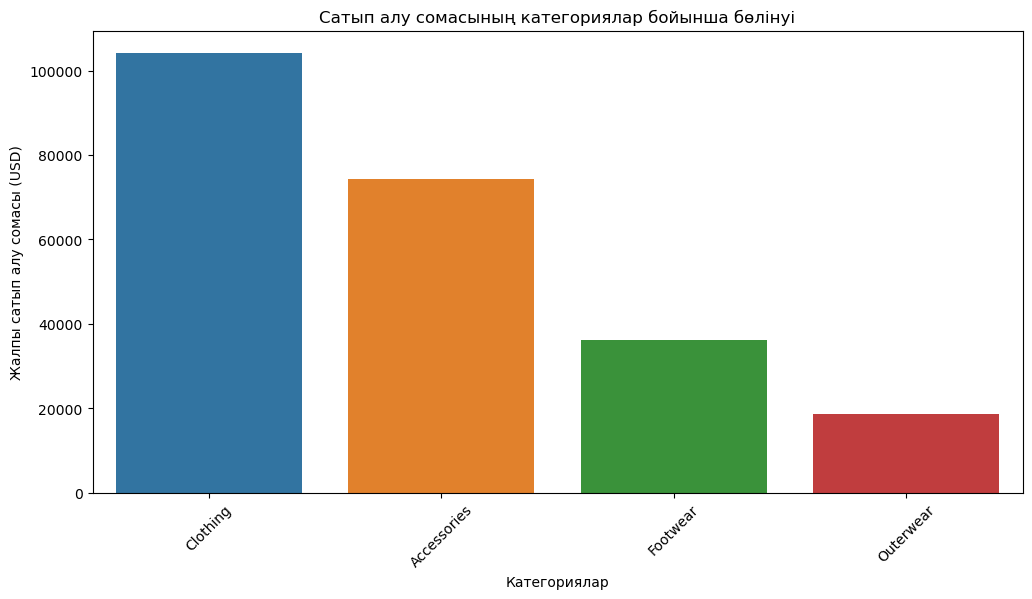

In [7]:
plt.figure(figsize=(12, 6))
category_counts = data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Сатып алу сомасының категориялар бойынша бөлінуі')
plt.ylabel('Жалпы сатып алу сомасы (USD)')
plt.xlabel('Категориялар')
plt.xticks(rotation=45)
plt.show()

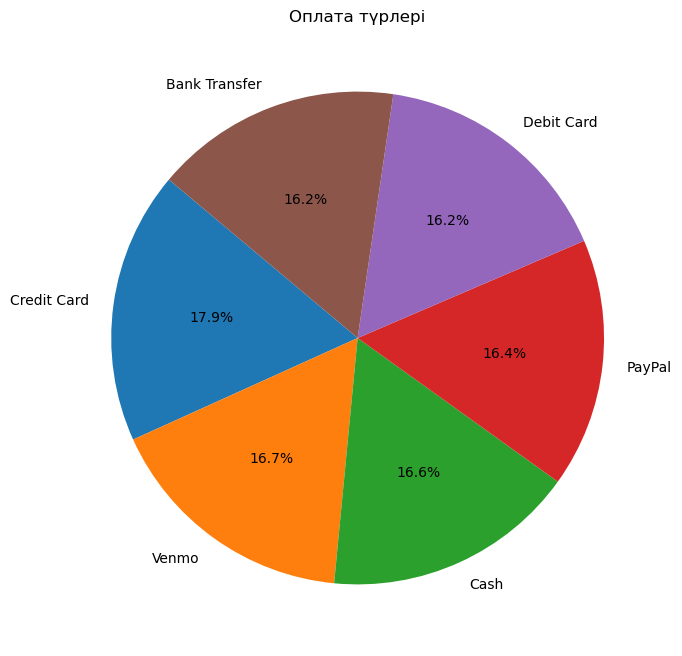

In [8]:
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Оплата түрлері')
plt.show()

In [9]:
data['Total After Discount'] = data['Purchase Amount (USD)'] * 0.9

data['Subscription Status'] = data['Subscription Status'].map({'Yes': 1, 'No': 0})

data['Age Group'] = pd.cut(data['Age'], bins=[10, 30, 50, 70, 100], labels=['10-30', '31-50', '51-70', '71+'])

filtered_data = data[(data['Age'] > 50) & (data['Purchase Amount (USD)'] > 100)]
print("\nПокупатели старше 50 с покупками выше 100 USD:")
print(filtered_data[['Customer ID', 'Age', 'Purchase Amount (USD)', 'Total After Discount', 'Age Group']])

sorted_data = data.sort_values(by='Purchase Amount (USD)', ascending=False)
print("\nТоп покупателей по сумме покупок:")
print(sorted_data[['Customer ID', 'Purchase Amount (USD)', 'Total After Discount']].head(10))

subset = data.loc[0:10, ['Customer ID', 'Age', 'Category', 'Total After Discount', 'Age Group']]
print("\nПоднабор первых 10 записей с новыми столбцами:")
print(subset)

additional_data = pd.DataFrame({
    'Customer ID': ['101', '102'],
    'Loyalty Points': [500, 700]
})
data = data.merge(additional_data, on='Customer ID', how='left')

data['Loyalty Points'] = data['Loyalty Points'].fillna(0)

print("\nДанные после объединения с таблицей бонусных баллов:")
print(data[['Customer ID', 'Loyalty Points', 'Total After Discount', 'Age Group']].head())


Покупатели старше 50 с покупками выше 100 USD:
Empty DataFrame
Columns: [Customer ID, Age, Purchase Amount (USD), Total After Discount, Age Group]
Index: []

Топ покупателей по сумме покупок:
     Customer ID  Purchase Amount (USD)  Total After Discount
2842        2843                    100                  90.0
95            96                    100                  90.0
581          582                    100                  90.0
1421        1422                    100                  90.0
3837        3838                    100                  90.0
861          862                    100                  90.0
2214        2215                    100                  90.0
1591        1592                    100                  90.0
1456        1457                    100                  90.0
243          244                    100                  90.0

Поднабор первых 10 записей с новыми столбцами:
   Customer ID  Age     Category  Total After Discount Age Group
0           

In [16]:
data['Total After Discount'] = data['Purchase Amount (USD)'] * 0.9
data['Subscription Status'] = data['Subscription Status'].map({'Yes': 1, 'No': 0})
data['Age Group'] = pd.cut(data['Age'], bins=[10, 30, 50, 70, 100], labels=['10-30', '31-50', '51-70', '71+'])

pivot_table = data.pivot_table(
    values='Total After Discount',
    index='Age Group',
    columns='Category',
    aggfunc='sum',
    fill_value=0
)
print("\nСводная таблица по покупкам:")
print(pivot_table)

def age_category(age):
    if age < 20:
        return 'Жасөспірім'
    elif age < 40:
        return 'Ересек'
    else:
        return 'Қарт'
    
data['Age Category'] = data['Age'].apply(age_category)

data['Bonus'] = data.apply(lambda x: 100 if x['Subscription Status'] == 1 else 0, axis=1)

print("\nЖас категориясы бойынша баған қосылды:")
print(data[['Customer ID', 'Age', 'Age Category']].head(10))

print("\nБонус бағаны қосылды:")
print(data[['Customer ID', 'Subscription Status', 'Bonus']].head(10))





Сводная таблица по покупкам:
Category   Accessories  Clothing  Footwear  Outerwear
Age Group                                            
10-30          16257.6   23581.8    7680.6     4031.1
31-50          25380.9   34536.6   12121.2     6605.1
51-70          25141.5   35719.2   12681.9     6035.4
71+                0.0       0.0       0.0        0.0

Жас категориясы бойынша баған қосылды:
           Customer ID  Age Age Category
Order Date                              
2024-01-01           1   55         Қарт
2024-01-02           2   19   Жасөспірім
2024-01-03           3   50         Қарт
2024-01-04           4   21       Ересек
2024-01-05           5   45         Қарт
2024-01-06           6   46         Қарт
2024-01-07           7   63         Қарт
2024-01-08           8   27       Ересек
2024-01-09           9   26       Ересек
2024-01-10          10   44         Қарт

Бонус бағаны қосылды:
           Customer ID  Subscription Status  Bonus
Order Date                              